In [ ]:
# Exploring survival patterns with Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv("train.csv") #Load the Titanic data
print(titanic.head())
print(titanic.describe()) #Basic Stats

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

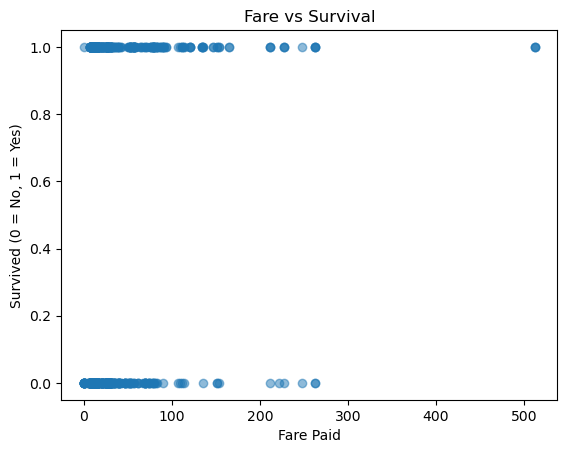

In [3]:
plt.scatter(titanic["Fare"], titanic["Survived"], alpha=0.5)
plt.title("Fare vs Survival")
plt.xlabel("Fare Paid")
plt.ylabel("Survived (0 = No, 1 = Yes)")
plt.show()

In [13]:
# Check for missing values
print("Missing values per column:")
print(titanic.isnull().sum())

# Quick stats on missing columns
print("\nPercentage missing:")
print(titanic.isnull().mean() * 100)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage missing:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [15]:
# Fill missing Age with median
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
print("Missing Age after filling:", titanic["Age"].isnull().sum())  # Should be 0

# Quick check
print(titanic[["Age", "Fare", "Survived"]].head())

Missing Age after filling: 0
    Age     Fare  Survived
0  22.0   7.2500         0
1  38.0  71.2833         1
2  26.0   7.9250         1
3  35.0  53.1000         1
4  35.0   8.0500         0


Survival rate by class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


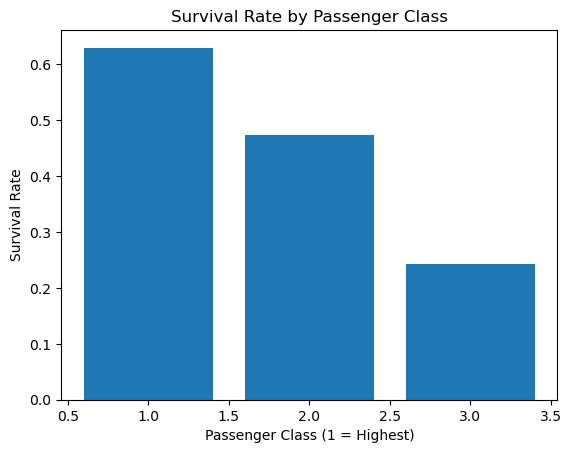

In [17]:
# Survival rate by Pclass
class_survival = titanic.groupby("Pclass")["Survived"].mean()
print("Survival rate by class:")
print(class_survival)

# Bar plot
plt.bar(class_survival.index, class_survival.values)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class (1 = Highest)")
plt.ylabel("Survival Rate")
plt.show()

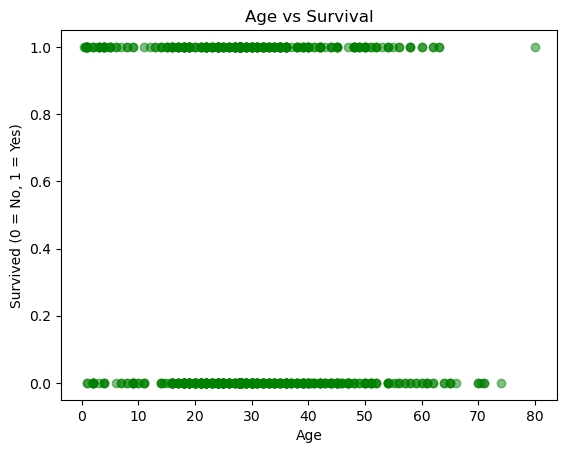

Average age by survival:
Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64


In [19]:
# Scatter plot: Age vs Survival
plt.scatter(titanic["Age"], titanic["Survived"], alpha=0.5, color="green")
plt.title("Age vs Survival")
plt.xlabel("Age")
plt.ylabel("Survived (0 = No, 1 = Yes)")
plt.show()

# Average age of survivors vs non-survivors
age_survived = titanic.groupby("Survived")["Age"].mean()
print("Average age by survival:")
print(age_survived)

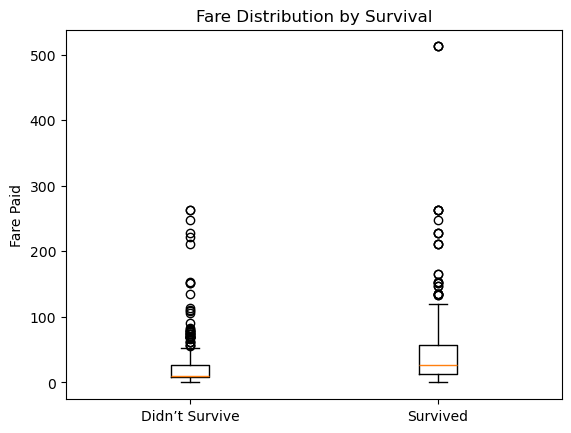

Median fare by survival:
Survived
0    10.5
1    26.0
Name: Fare, dtype: float64


In [21]:
# Box plot: Fare by Survival
plt.boxplot([titanic[titanic["Survived"] == 0]["Fare"],
             titanic[titanic["Survived"] == 1]["Fare"]],
            labels=["Didn’t Survive", "Survived"])
plt.title("Fare Distribution by Survival")
plt.ylabel("Fare Paid")
plt.show()

# Median fares
print("Median fare by survival:")
print(titanic.groupby("Survived")["Fare"].median())

In [23]:
# Summary stats
survival_rate = titanic["Survived"].mean() * 100
print(f"Overall survival rate: {survival_rate:.1f}%")

# Key findings
print("\nKey Findings:")
print(f"1st class survival rate: {class_survival[1]*100:.1f}% vs. 3rd class: {class_survival[3]*100:.1f}%")
print(f"Median fare for survivors: {titanic[titanic['Survived'] == 1]['Fare'].median():.1f} vs. non-survivors: {titanic[titanic['Survived'] == 0]['Fare'].median():.1f}")
print(f"Average age similar across survival: ~{age_survived[0]:.1f} years")

Overall survival rate: 38.4%

Key Findings:
1st class survival rate: 63.0% vs. 3rd class: 24.2%
Median fare for survivors: 26.0 vs. non-survivors: 10.5
Average age similar across survival: ~30.0 years
